In [1]:
import pandas as pd
import numpy as np

In [2]:
me_m = pd.read_csv("../data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100

#rets.plot.line()

## Timeseries - forcing the index to be a datetime

Not always to `parse_dates` in `read_csv()` is enough.

In [3]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.head(3)

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067


In [4]:
rets.index = rets.index.to_period('M')
rets.head(3)

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067


In [16]:
rets.describe()

,SmallCap,LargeCap
count,1110.000000,1110.000000
mean,0.017598,0.008870
std,0.106288,0.053900
min,-0.291400,-0.284300
25%,-0.027350,-0.017025
50%,0.010450,0.011400
75%,0.049950,0.037650
max,1.342900,0.377900


## Computing Drawdowns

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value


# Creating a Drawdown Function


In [34]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset.

       Returns a DataFrame with columns for
       the wealth index,
       the previous peaks, and
       the percentage drawdown
    """
    wealth_index = 1000 * (1+return_series).cumprod() # La evolucion compuesta de la inv. inicial
    previous_peaks = wealth_index.cummax() # Actualiza cada nuevo maximo
    drawdowns = wealth_index/previous_peaks - 1 # Perdida con respecto al maximo anterior, si hay ganancia, peak = wealth, ( 1 - 1 = 0 )
    return pd.DataFrame({"Wealth": wealth_index,
                         "Previous Peak": previous_peaks,
                         "Drawdown": drawdowns})

df = drawdown(rets["LargeCap"])

print(df.shape)
df.head()

(1110, 3)


,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


<AxesSubplot:>

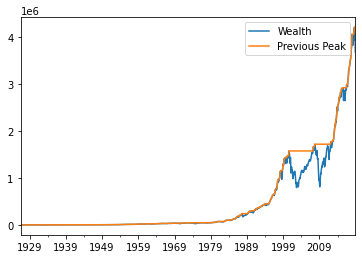

In [38]:
df[['Wealth', 'Previous Peak']].plot()

<AxesSubplot:>

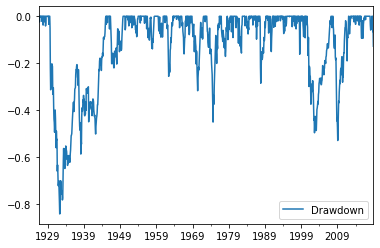

In [39]:
df[['Drawdown']].plot()

In [41]:
print( df.min() )
print()

print( df["Drawdown"].idxmin() ) # crisis 1929
print()

print( df["1975":]["Drawdown"].idxmin() ) # crisis 2009
print()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

1932-05

2009-02

